In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [3]:
data=pd.read_csv("IMDb_Dataset.csv")

In [4]:
data.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [5]:
data.shape

(400, 9)

In [6]:
data.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Duration (minutes)    float64
dtype: object

In [20]:
data=data.drop_duplicates("Title")

In [8]:
data.isnull().sum()

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64

In [9]:
data.shape

(251, 9)

In [10]:
data.describe()

,IMDb Rating,Year,MetaScore,Duration (minutes)
count,251.000000,251.000000,251.000000,251.000000
mean,7.170916,2014.274900,67.579681,117.923904
std,0.950153,14.034818,15.068511,22.599727
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2008.000000,59.000000,102.000000
50%,7.100000,2022.000000,67.000000,116.300000
75%,7.800000,2024.000000,78.000000,126.000000
max,9.200000,2025.000000,100.000000,206.000000


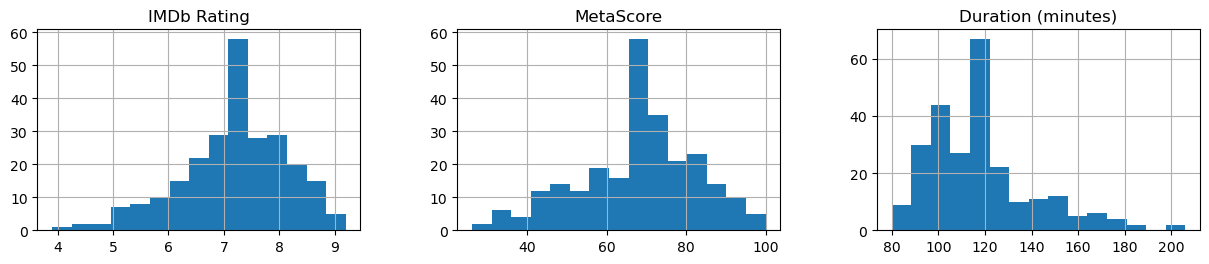

In [13]:
numerical_cols = ['IMDb Rating', 'MetaScore', 'Duration (minutes)']
data[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

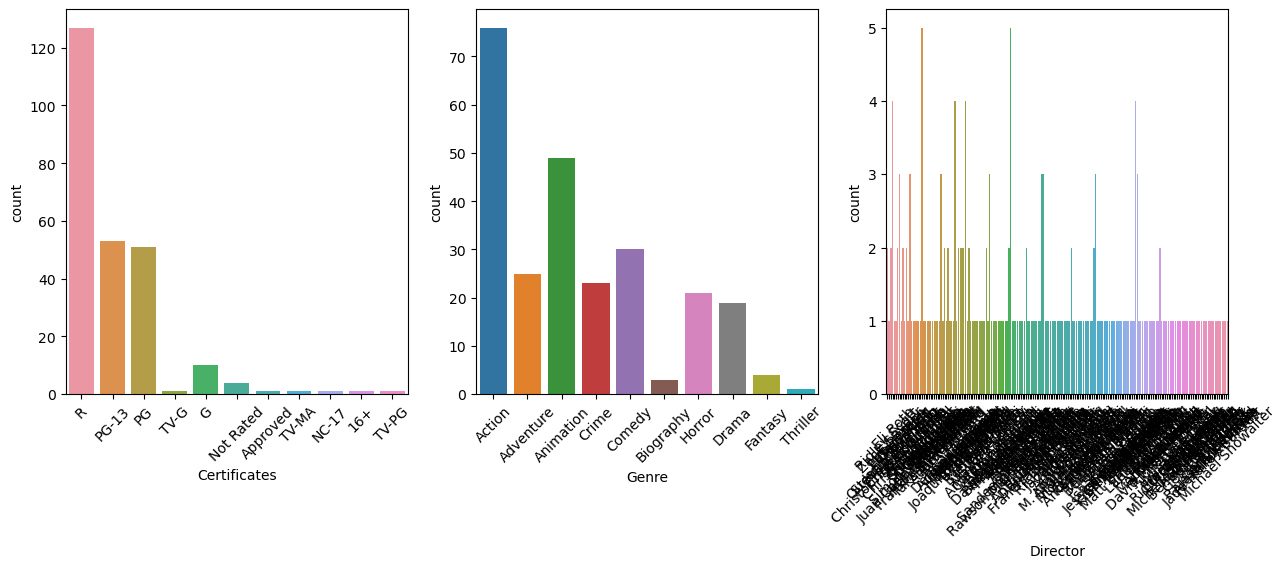

In [15]:
# Bar plots for categorical features
categorical_cols = ['Certificates', 'Genre', 'Director']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
plt.show()

In [9]:
sorted_data_imdb=data.sort_values(by="IMDb Rating",ascending=False)

In [10]:
sorted_data_imdb.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
137,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,175.0
130,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,152.0
106,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,Reginald Rose,97.0,96.0
15,The Lord of the Rings: The Fellowship of the Ring,8.9,2001,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,92.0,178.0
132,Pulp Fiction,8.9,1994,R,Crime,Quentin Tarantino,Quentin TarantinoRoger Avary,95.0,154.0


In [11]:
filtered_df_year = sorted_data_imdb[(sorted_data_imdb['Year'] >= 2000) & (sorted_data_imdb['Year'] <= 2024)]
filtered_df_year.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
130,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,152.0
15,The Lord of the Rings: The Fellowship of the Ring,8.9,2001,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,92.0,178.0
14,Inception,8.8,2010,PG-13,Action,Christopher Nolan,Leonardo DiCaprioJoseph Gordon-LevittElliot Page,74.0,148.0
24,Interstellar,8.7,2014,PG-13,Adventure,Christopher Nolan,Matthew McConaugheyAnne HathawayJessica Chastain,74.0,169.0
47,Dune: Part Two,8.6,2024,PG-13,Action,Denis Villeneuve,Timothée ChalametZendayaRebecca Ferguson,79.0,166.0


In [12]:
filtered_df_year["Director"].value_counts()

Denis Villeneuve     4
Christopher Nolan    3
Quentin Tarantino    3
David Leitch         3
Matt Reeves          3
                    ..
Mark Mylod           1
Rob Marshall         1
Michael Sarnoski     1
Danny Philippou      1
S.J. Clarkson        1
Name: Director, Length: 174, dtype: int64


Correlation Matrix:
                    IMDb Rating  MetaScore  Duration (minutes)
IMDb Rating            1.000000   0.698105            0.384912
MetaScore              0.698105   1.000000            0.189360
Duration (minutes)     0.384912   0.189360            1.000000


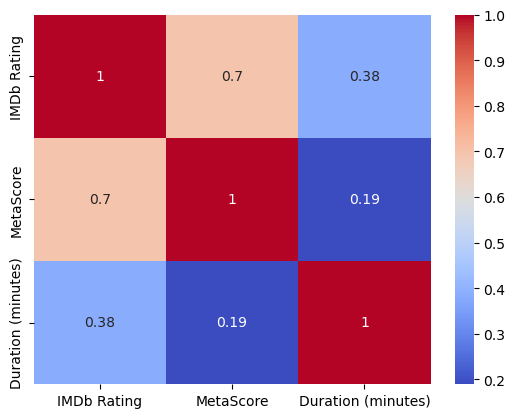

In [16]:
correlation_matrix = data[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Preprocess the categorical data
categorical_cols = ['Genre', 'Director', 'Star Cast']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(data[categorical_cols])

# Combine with numerical features
numerical_cols = ['IMDb Rating', 'MetaScore', 'Duration (minutes)']
numerical_features = data[numerical_cols].values

In [25]:
scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for illustration
pca_features = pca.fit_transform(normalized_numerical_features)

# Combine all features into a single feature set
features = np.hstack([pca_features, encoded_features.toarray()])

In [26]:
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(features)

NearestNeighbors()

In [35]:
def get_recommendations(title, k=5):
    # Strip leading and trailing whitespaces from the title
    title = title.strip()
    # Check if the title exists in the DataFrame
    if title not in data['Title'].values:
        print(f"Movie '{title}' not found in the dataset.")
        return None, None
    
    # Find the index of the movie
    idx = data.index[data['Title'] == title].tolist()[0]
    # Ensure k does not exceed the number of samples
    k = min(k, len(data) - 1)
    # Find k nearest neighbors
    distances, indices = knn.kneighbors([features[idx]], n_neighbors=k+1)
    # Get the indices of the recommended movies
    rec_indices = indices.flatten()[1:]
    # Return the index and titles and years of the recommended movies
    return idx, data.iloc[rec_indices][['Title', 'Year']]

5 recommended movies based on your interest: 
                                             Title  Year
130                                The Dark Knight  2008
49                         Furiosa: A Mad Max Saga  2024
213                              Blade Runner 2049  2017
211                                     The Matrix  1999
1    Mission: Impossible - Dead Reckoning Part One  2023


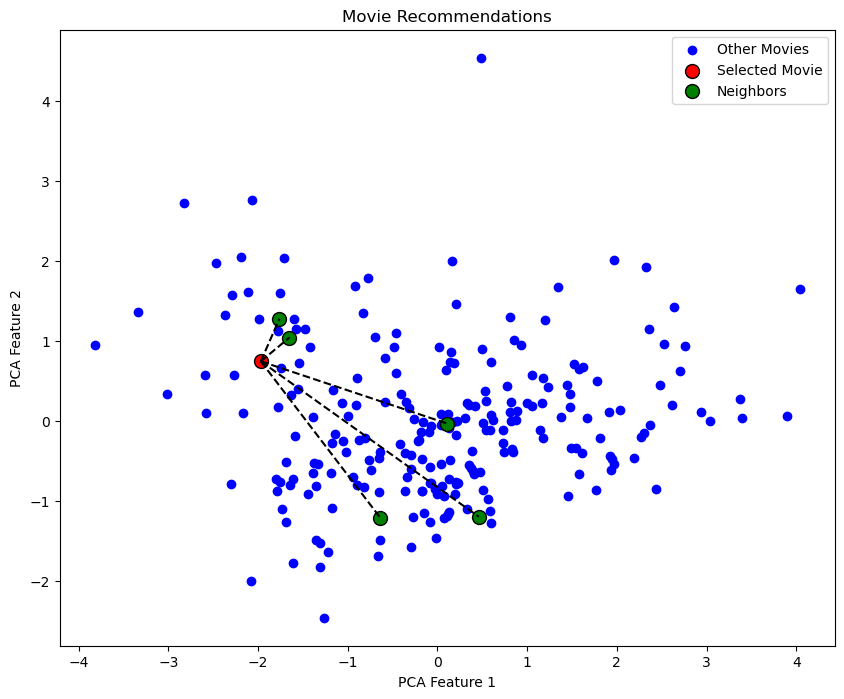

In [36]:
# Example usage
title = 'Inception'
idx, recommendations = get_recommendations(title, k=5)
print("5 recommended movies based on your interest: ")
print(recommendations)

# Plotting
plt.figure(figsize=(10, 8))

# Plot all movies in blue
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue', label='Other Movies')

# Plot the target movie in red
plt.scatter(pca_features[idx, 0], pca_features[idx, 1], c='red', label='Selected Movie', edgecolors='black', s=100)

# Plot the nearest neighbors in green
rec_indices = recommendations.index
plt.scatter(pca_features[rec_indices, 0], pca_features[rec_indices, 1], c='green', label='Neighbors', edgecolors='black', s=100)

# Draw lines from the target movie to its neighbors
for i in rec_indices:
    plt.plot([pca_features[idx, 0], pca_features[i, 0]], [pca_features[idx, 1], pca_features[i, 1]], 'k--')

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Movie Recommendations')
plt.legend()
plt.show()